<a href="https://colab.research.google.com/github/iamnelsonizah/Computer-Vision-Projects-with-Python/blob/main/Mineral1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in CSV: ['system:index', 'B2', 'B3', 'B4', 'B8', 'LS_Alunite', 'LS_Clay', 'LS_IronOxide', 'LS_SWIR', 'S2_Alunite', 'S2_Clay', 'S2_IronOxide', 'S2_SWIR', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', '.geo']
   system:index        B2        B3        B4       B8  LS_Alunite   LS_Clay  \
0             0  0.092555  0.118262  0.143189  0.20782    1.334867  0.804183   
1             1  0.119867  0.171250  0.230950  0.30430    1.354593  0.863419   
2             2  0.105500  0.131417  0.161891  0.22216    1.530354  0.882500   
3             3  0.099667  0.132900  0.171800  0.24535    1.290345  0.844582   
4             4  0.049443  0.069129  0.091400  0.17090    1.548385  0.638412   

   LS_IronOxide   LS_SWIR  S2_Alunite   S2_Clay  S2_IronOxide   S2_SWIR  \
0      1.659905  0.233758    1.150876  0.825881      1.393514  0.289600   
1      1.568871  0.323160    1.086099  0.880394      1.233651  0.375400   
2      1.734112  0.293840    1.313918  0.908780      1.445805  0.321200   
3      1.52779

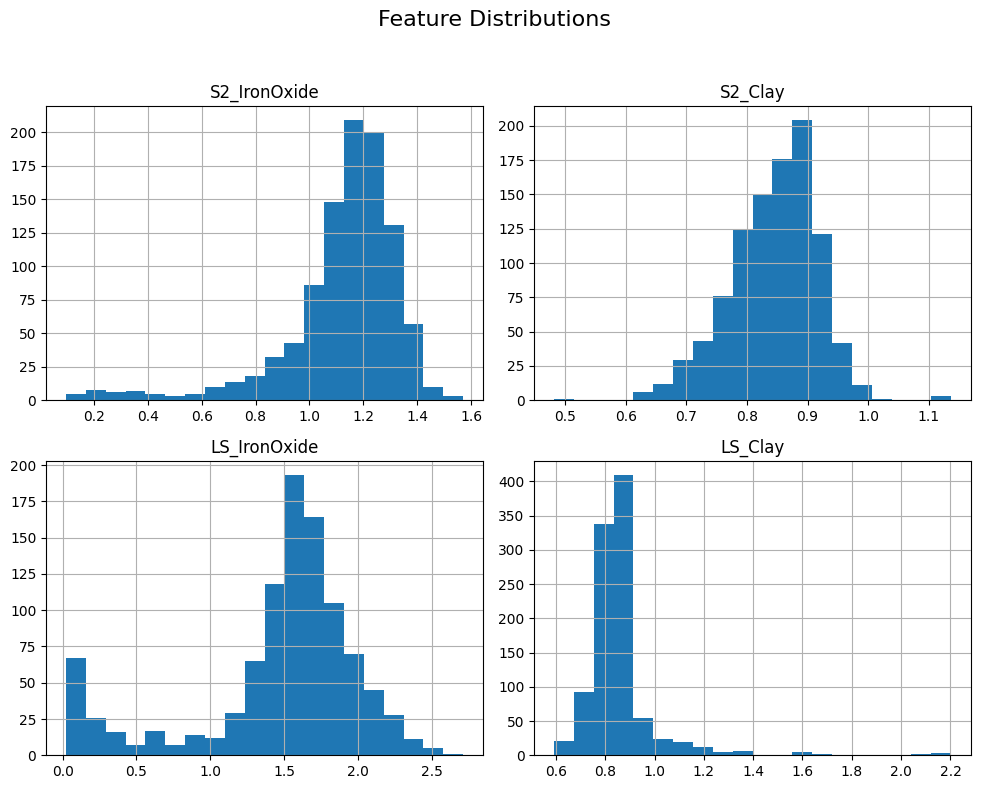

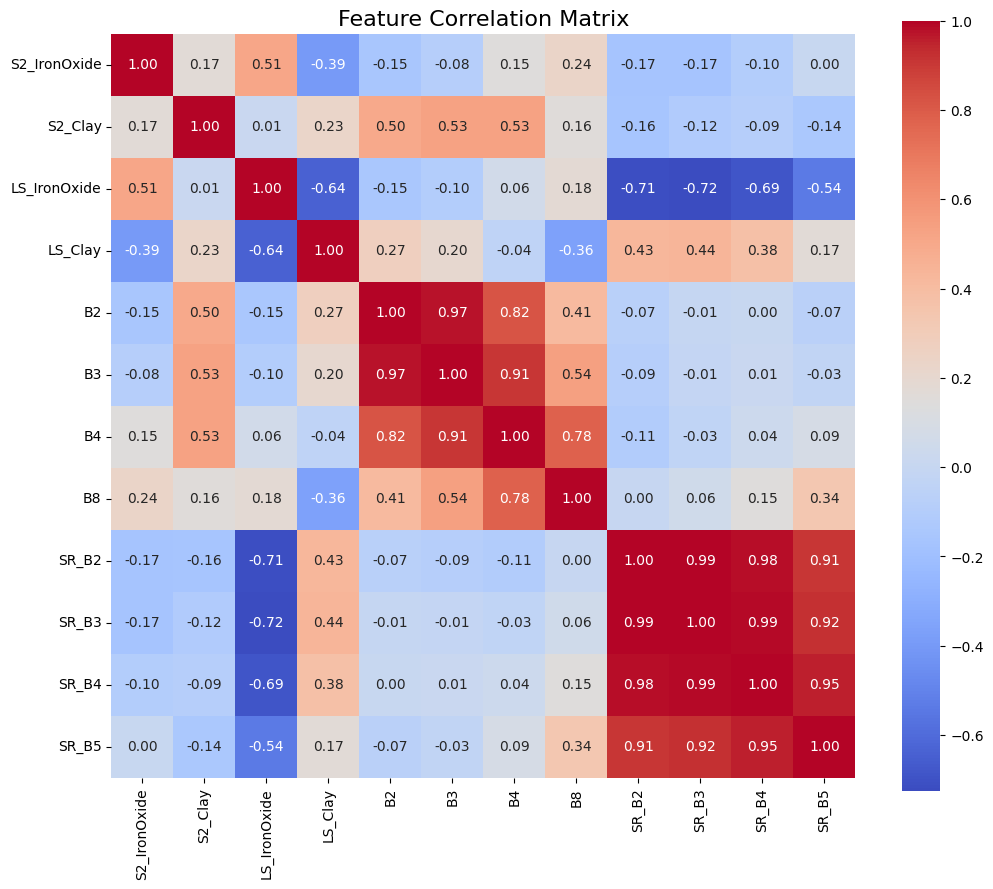

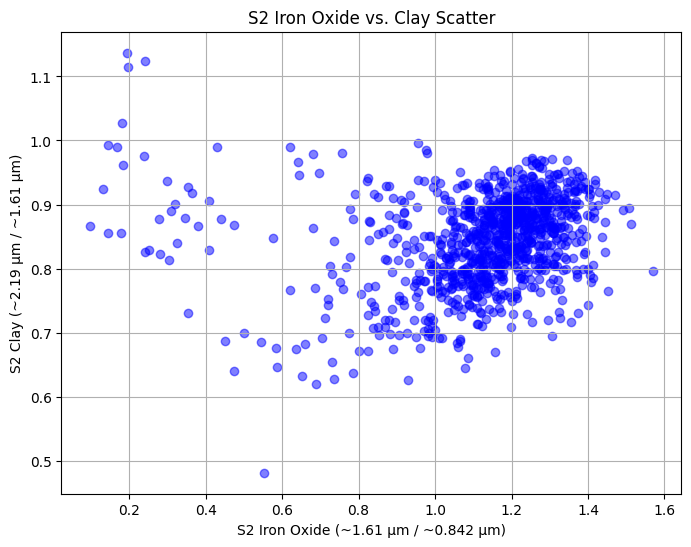

No 'Cluster' column in CSV. Run clustering in Python if needed.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
data = pd.read_csv('/content/sample_data/Mineral_ML_Features_Kazakhstan.csv')
print("Columns in CSV:", data.columns.tolist())
print(data.head())

# Select numeric columns for analysis
numeric_cols = ['S2_IronOxide', 'S2_Clay', 'LS_IronOxide', 'LS_Clay',
                'B2', 'B3', 'B4', 'B8', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5']
numeric_data = data[numeric_cols]

# Summary statistics
print("Summary Statistics:\n", numeric_data.describe())

# Histograms of key features
numeric_data[['S2_IronOxide', 'S2_Clay', 'LS_IronOxide', 'LS_Clay']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# Scatter plot: Iron Oxide vs. Clay (S2)
plt.figure(figsize=(8, 6))
plt.scatter(numeric_data['S2_IronOxide'], numeric_data['S2_Clay'], c='blue', alpha=0.5)
plt.xlabel('S2 Iron Oxide (~1.61 µm / ~0.842 µm)')
plt.ylabel('S2 Clay (~2.19 µm / ~1.61 µm)')
plt.title('S2 Iron Oxide vs. Clay Scatter')
plt.grid(True)
plt.show()

# Box plot: Feature distribution by hypothetical clusters (if cluster column exists)
if 'Cluster' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y='S2_IronOxide', data=data)
    plt.title('S2 Iron Oxide by Cluster')
    plt.show()
else:
    print("No 'Cluster' column in CSV. Run clustering in Python if needed.")